In [3]:
import osmnx as ox    # calculate great circle distance
import numpy as np
from pyproj import Geod   # working with the Earth as an ellipsod (WGS-84)
import geopy.distance     # working with the Earth as an ellipsod (WGS-84)

import matplotlib.pyplot as plt
from cartopy import crs as ccrs, feature as cfeature    # making world map

##### Calculating Great Circle Distances from one lat/lon to another lat/lon

In [4]:
# calculating one distance

# coordinates
tvm_lat, tvm_lon = 8.50606, 76.96153
nwdelhi_lat, nwdelhi_lon = 28.6139, 77.2090

# great circle distance
great_circle_dist = ox.distance.great_circle(
    nwdelhi_lat, nwdelhi_lon, tvm_lat, tvm_lon,
    earth_radius=6371009)

In [5]:
print(great_circle_dist, "meters")

2236043.023561823 meters


In [ ]:
# calculating multiple distances

# coordinates
tvm_lat, tvm_lon = 8.50606, 76.96153
mum_lat, mum_lon = 19.0760, 72.8777
dlh_lat, dlh_lon = 28.6139, 77.2090

# set array of coordinates
from_lat = np.array([tvm_lat, dlh_lat])
from_lon = np.array([tvm_lon, dlh_lon])
to_lat = np.array([mum_lat, tvm_lat])
to_lon = np.array([mum_lon, tvm_lon])

# great circle distance for array of params
distances = ox.distance.great_circle(
    from_lat, from_lon, to_lat, to_lon,
    earth_radius=6371009)

print(distances)

[1255079.11904625 2236043.02356182]


#### Mapping Great Circle Route

In [6]:
# Find Latitude Coordinate based on a Longitude Coordinate and a Great Circle Arc formed by Point A (start) to Point B (end)
def generate_latitude_along_gc(start_point_lat, start_point_lon, end_point_lat, end_point_lon, number_of_lon_pts=360):
    # Generate a list of latitude coordinates for the great circle path

    # First convert each point to radians (to work with sin/cos)
    lat1 = np.deg2rad(start_point_lat)
    lon1 = np.deg2rad(start_point_lon)
    lat2 = np.deg2rad(end_point_lat)
    lon2 = np.deg2rad(end_point_lon)

    # Verify not meridian (longitude passes through the poles)
    # If points lie at the same longitude, alert user and return a totally linear path
    if np.sin(lon1 - lon2) == 0:
        print("Invalid inputs: start/end points are meridians")
        # plotting meridians at 0 longitude through all latitudes
        meridian_lat = np.arange(-90, 90, 180/len(longitude_lst)) # split in n number
        meridians = []
        for lat in meridian_lat:
            meridians.append((lat, 0))
        return meridians

    # verify not antipodal (diametrically opposite points)
    if lat1 + lat2 == 0 and abs(lon1-lon2) == np.pi:
        # if points are anitpodal, alert user and return empty list
        print("Invalid inputs: start/end points are antipodal")
        return []

    # generate N total number of longitude points along the great circle
    # Similar code in R: https://github.com/rspatial/geosphere/blob/master/R/greatCircle.R#L18C3-L18C7
    gc_lon_lst = []
    for lon in range(1, number_of_lon_pts+1):
        new_lon = (lon  * (360/number_of_lon_pts) - 180)
        gc_lon_lst.append(np.deg2rad(new_lon))

    # Intermediate points on a great circle: https://edwilliams.org/avform147.htm#Int
    # Equation 22
    gc_lat_lon = []
    for gc_lon in gc_lon_lst:
        num = np.sin(lat1)*np.cos(lat2)*np.sin(gc_lon-lon2)-np.sin(lat2)*np.cos(lat1)*np.sin(gc_lon-lon1)
        den = np.cos(lat1)*np.cos(lat2)*np.sin(lon1-lon2)
        new_lat = np.arctan(num/den)
        # convert back to degrees and save latitude/longitude pair
        gc_lat_lon.append((np.rad2deg(new_lat), np.rad2deg(gc_lon)))
    return gc_lat_lon

In [7]:
def arc_points(start_lat=None, start_lon=None, end_lat=None, end_lon=None, n_total_points=10):
    _, _, distance_meter =  geodesic.inv(start_lon, start_lat, end_lon, end_lat)
        
    distance_between_points_meter = distance_meter / (n_total_points + 1)

    
    points_along_arc = interpolate_points_along_gc(start_lat, start_lon, end_lat, end_lon, 
                                                   distance_between_points_meter)
    return points_along_arc

In [9]:
# Set up world map plot
def plot_coordinate(start_point_lat, start_point_lon, end_point_lat, end_point_lon, lat_lon_lst=None, title=None):
    fig = plt.subplots(figsize=(15, 10))
    projection_map = ccrs.PlateCarree()
    ax = plt.axes(projection=projection_map)
    lon_west, lon_east, lat_south, lat_north = -180, 180, -90, 90
    ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
    ax.coastlines(color="black")
    ax.add_feature(cfeature.BORDERS, edgecolor='grey')
    ax.add_feature(cfeature.STATES, edgecolor="grey")
        
    # Get list of points along the great circle path (in blue)
    longitudes = [x[1] for x in lat_lon_lst] # longitude
    latitudes = [x[0] for x in lat_lon_lst] # latitude
    plt.plot(longitudes, latitudes, c="cornflowerblue")
    plt.scatter(longitudes, latitudes, c="cornflowerblue")

    # Generate a great circle arc from the starting to ending point (in red)
    start_end_lat_lon = arc_points(start_point_lat, start_point_lon, end_point_lat, end_point_lon,
                                   n_total_points=20)
    longitudes = [x[1] for x in start_end_lat_lon] # longitude
    latitudes = [x[0] for x in start_end_lat_lon] # latitude
    plt.plot(longitudes, latitudes, c="red")
    plt.scatter(longitudes, latitudes, c="red")
    
    # Setup Axis Limits and Title/Labels
    plt.title(title)
    plt.show()

TypeError: 'float' object is not iterable

c:\Users\LAKwon\anaconda3\envs\capstone\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\LAKwon\anaconda3\envs\capstone\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\LAKwon\anaconda3\envs\capstone\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


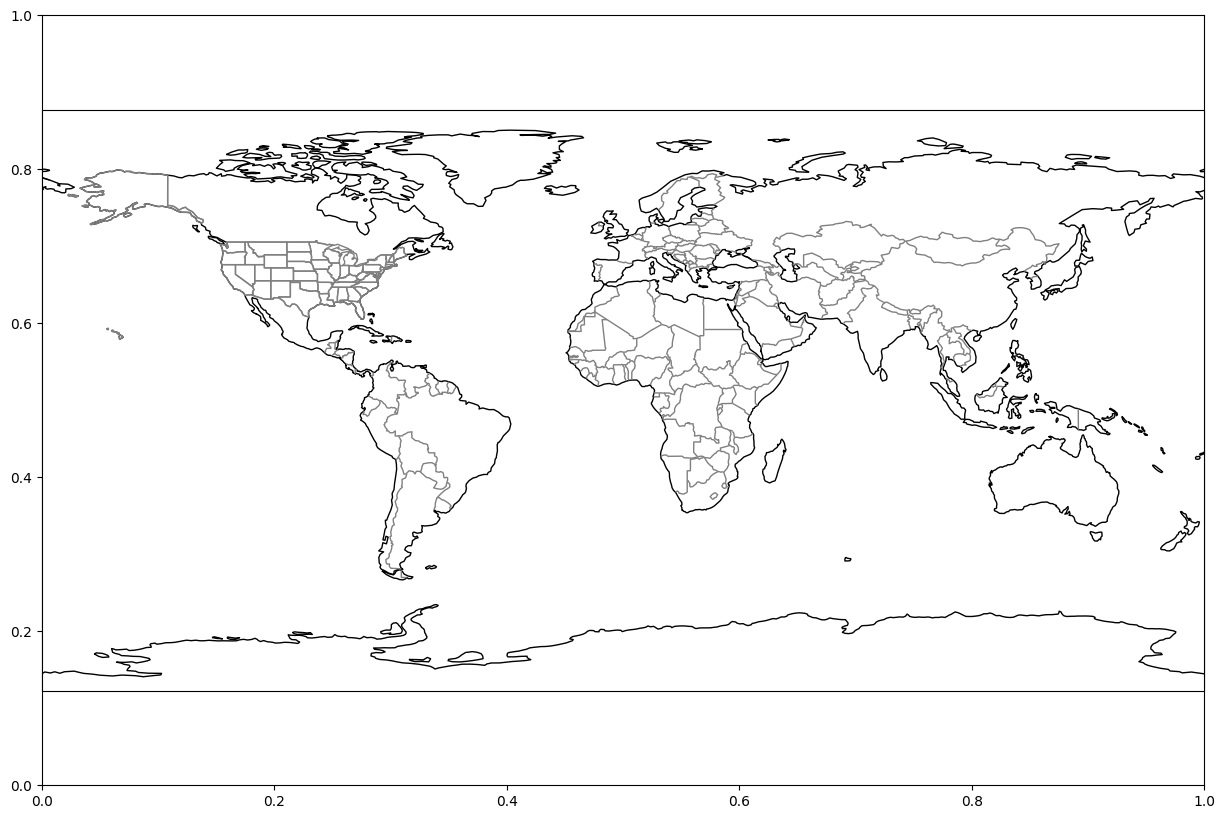

In [11]:
start_pt_lat = 32.299507
start_pt_lon = -64.790337
end_pt_lat = 32.38
end_pt_lon = 16.9167
n_pts = 360 # number of points along the longitude (resolution for 360 is one point for each 1 degree)
lat_lon_pts = generate_latitude_along_gc(start_pt_lat, start_pt_lon, end_pt_lat, end_pt_lon, number_of_lon_pts=n_pts)
plot_coordinate(lat_lon_pts, start_pt_lat, start_pt_lon, end_pt_lat, end_pt_lon,
                f"Plot Great Circle, made from the arc Bermuda to Madeira")